In [23]:
# Import the libraries that we will use for this project 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as numpy


url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" # URL of where the data is located 
text_result = requests.get(url).text
Data = BeautifulSoup(text_result, 'lxml') 

# Time to create the DataFrame 
name_of_dataFrame_columns = ['Postal Code' , 'Borough' , 'Neighbourhood']
Toronto_Neighbourhoods_DataFrame = pd.DataFrame(columns = name_of_dataFrame_columns) # Created a dataframe with the appropriate column names as necessary 

content = Data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0 # Set postal code equal to 0
borough = 0 # Set borough equal to 0 
neighborhood = 0 # Set neighbourhood to 0 

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text
            i = i + 1
        elif i == 1:
            borough = td.text
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    Toronto_Neighbourhoods_DataFrame = Toronto_Neighbourhoods_DataFrame.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True) # Append the values to the df


Toronto_Neighbourhoods_DataFrame = Toronto_Neighbourhoods_DataFrame[Toronto_Neighbourhoods_DataFrame.Borough!='Not assigned']
Toronto_Neighbourhoods_DataFrame = Toronto_Neighbourhoods_DataFrame[Toronto_Neighbourhoods_DataFrame.Borough!= 0]
Toronto_Neighbourhoods_DataFrame.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,Toronto_Neighbourhoods_DataFrame.shape[0]):
    if Toronto_Neighbourhoods_DataFrame.iloc[i][2] == 'Not assigned':
        Toronto_Neighbourhoods_DataFrame.iloc[i][2] = Toronto_Neighbourhoods_DataFrame.iloc[i][1]
        i = i+1
                                 
df = Toronto_Neighbourhoods_DataFrame.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head()
# Print the first 5 rows of the data frame 

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [20]:
DataFrame_1= df.dropna()# Remove the missing values 
empty = 'Not assigned' # Have the empty values as not assigned as per the assignment speficiations 
DataFrame_1 = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)


SyntaxError: unexpected EOF while parsing (<ipython-input-20-c1876181bf37>, line 3)

In [21]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
DataFrame_Answer= grp.apply(neighborhood_list).reset_index(name='Neighborhood')

print(DataFrame_Answer.shape) # Use the shape method 
DataFrame_Answer.head(10) #Return the first 10 rows of the data frame 

(103, 3)


,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [25]:
print('The DataFrame shape is', DataFrame_Answer.shape) #Use the shape method to return a tuple of the dimensions of the dataframe

The DataFrame shape is (103, 3)


In [26]:
Toronto_Geographical_Data = 'https://cocl.us/Geospatial_data'
!wget -q -O 'toronto_m.geospatial_data.csv' toronto_geocsv
Toronto_Geographical_Data = pd.read_csv(Toronto_Geographical_Data).set_index("Postal Code")
Toronto_Geographical_Data.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


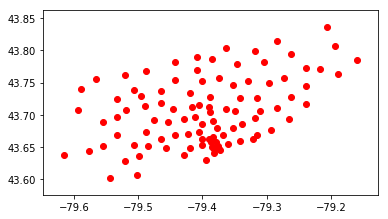

In [37]:
# Necesary import statements to create our map

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

import wikipedia as wp
import pandas as pd 

# Obtain our data 
HTML_Webpage = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# We create our Data Frame object as needed. 
DATAFRAME = pd.read_html(HTML_Webpage, header = 0)[0]
DATAFRAME = DATAFRAME[DATAFRAME.Borough != 'Not assigned'] # Ignore any cells that do not have any Borough attached to it . 
DATAFRAME = DATAFRAME.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# Iteration 
for index, row in DATAFRAME.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
url="http://cocl.us/Geospatial_data"
REQUEST=requests.get(url).content
COLUMN=pd.read_csv(io.StringIO(s.decode('utf-8')))

COLUMN.columns = ['Postcode', 'Latitude', 'Longitude']
DATAFRAME = pd.merge(COLUMN, df, on='Postcode')

DATAFRAME = DATAFRAME[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

# load latitude and longitude into geopandas dataframe
DATAFRAME['Coordinates'] = list(zip(DATAFRAME.Longitude, DATAFRAME.Latitude))
DATAFRAME['Coordinates'] = DATAFRAME['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(DATAFRAME, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()